In [2]:
%matplotlib widget
from segment_anything import sam_model_registry
from utils.demo import BboxPromptDemo
MedSAM_CKPT_PATH = "/media/my_ftp/BasesDeDatos_Paranasal_CAT/CT_Craneal/DL_Models/Model_MedSAM/medsam_vit_b.pth"
device = "cuda:1"
medsam_model = sam_model_registry['vit_b'](checkpoint=MedSAM_CKPT_PATH)
medsam_model = medsam_model.to(device)
medsam_model.eval()

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


Button(description='clear', style=ButtonStyle())

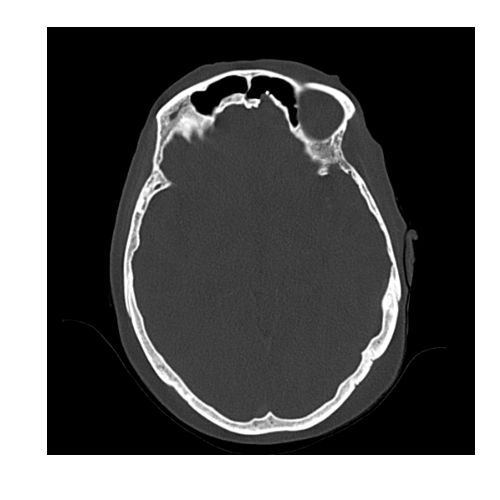

Button(description='save', style=ButtonStyle())

Segmentation result saved to /home/ysun@gaps_domain.ssr.upm.es/Craneal_CT/medSAM_test


In [6]:
# abdomen CT
img = "/home/ysun@gaps_domain.ssr.upm.es/Craneal_CT/medSAM_test/s967_121 2.png"
bbox_prompt_demo = BboxPromptDemo(medsam_model)
bbox_prompt_demo.show(img)

Button(description='clear', style=ButtonStyle())

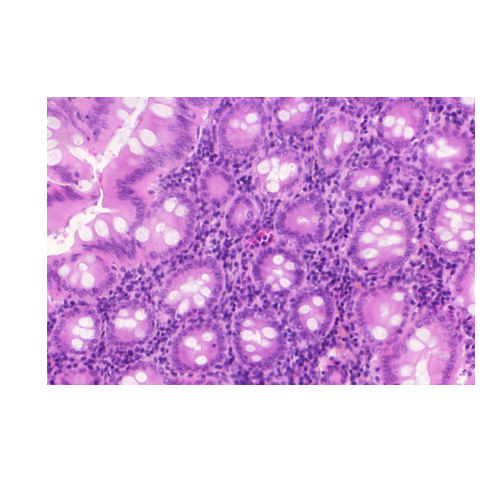

Button(description='save', style=ButtonStyle())

In [5]:
# colon gland pathology image
# important: please re-run this cell to avoid using the above image embedding.
img = "/home/ysun@gaps_domain.ssr.upm.es/Craneal_CT/MedSAM/assets/pathology.png"
bbox_prompt_demo = BboxPromptDemo(medsam_model)
bbox_prompt_demo.show(img)

## 4. Others

Now, we have shown how to use MedSAM to segment medical images by drawing bounding boxes. We also provide advanced tutorials to show 
   - a. How was MedSAM trained? or How to fine-tune SAM on customized datasets? [training](https://github.com/bowang-lab/MedSAM/tree/main#model-training)
   - b. How to fine-tune the model with text-based prompts: [training](https://github.com/bowang-lab/MedSAM/tree/main/extensions/text_prompt) and [inference colab](https://colab.research.google.com/drive/1wexPLewVMI-9EMiplfyoEtGGayYDH3tt?usp=sharing) 
   - c. How to fine-tune the model with point-based prompts: [training](https://github.com/bowang-lab/MedSAM/tree/main/extensions/point_prompt) and [inference colab](https://colab.research.google.com/drive/1cCBw_IhdPiWE4sN7QwqKJPgAFlWsKgkm?usp=sharing)